In [7]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [8]:
def incr_deg(degrees, draws):
    for i in range(len(degrees)):
        if i in draws:
            degrees[i] += 1            
            
    return degrees

Main begins, setting variables

In [12]:
n = 3    # starting nodes
t = 1000    # nodes and time-steps    
m = 2    # links added at each time step
fitness, factors, probs = [], [], []
mu = np.array([])

energy_samples = np.sqrt(np.random.uniform(0, 1, t))    # samples from the inverse of the CDF
T = np.linspace(.01, 10, t)
G = nx.complete_graph(n)    # starting graph

degrees = [deg for node, deg in G.degree()]


Simulation of the network evolution:

In [16]:
for val in range(t):
    
    if val >= n:
        draws = np.random.choice(list(range(val)), size = m, replace = False, p = probs)
        G.add_node(val)
        G.add_edges_from((val, i) for i in draws)
        
        degrees.append(G.degree(val))
        degrees = incr_deg(degrees, draws)
    
    fitness = np.exp(-energy_samples/T)
    factors.append(fitness[val]*degrees[val])
    
    probs = [factors[j]/sum(factors) for j in range(val+1)]

In [18]:
k_values = np.array(degrees)

Z_t = [np.sum(k_values * np.exp(-1/temp * energy_samples)) for temp in T]

for idx in range(T.size):
    mu = np.append(mu, -T[idx] * np.log(Z_t[idx]/(m*t)))    # chemical potential
  

Plotting with matplotlib

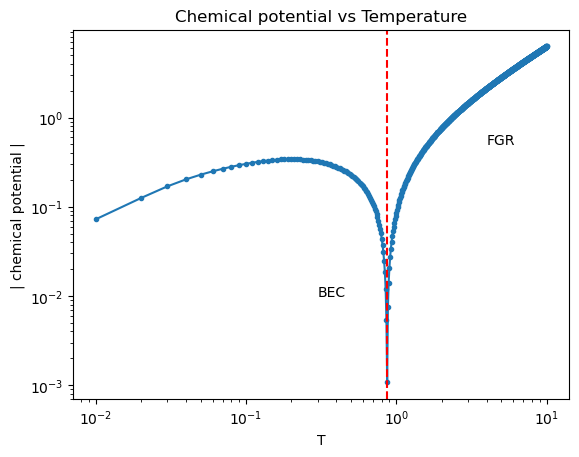

In [41]:
plt.plot(T, np.abs(mu), marker = '.', linestyle = '-')
plt.axvline(x = T[np.argmin(np.abs(mu))], color = 'r', linestyle = '--')
plt.xscale('log')
plt.yscale('log')
plt.title('Chemical potential vs Temperature')
plt.xlabel('T')
plt.ylabel('| chemical potential |')
plt.annotate('BEC', xy = (0.5, 0.2), xytext = (0.3, 0.01))
plt.annotate('FGR', xy = (2, 0.2), xytext = (4, 0.5))
plt.show()